### 增強學習是什麼

在人工智能領域，一般用代理人Agent來表示一個具備行為能力的物體，比如機器人，無人車，人等等。那麼增強學習考慮的問題就是Agent和環境Environment之間交互的任務。不管是什麼樣的任務，都包含了一系列的動作Action,觀察Observation還有獎勵值Reward。所謂的Reward就是Agent執行了動作與環境進行交互後，環境會發生變化，變化的好與壞就用Reward來表示。由於動作集合的數量將直接影響整個任務的求解難度，因此DeepMind才從玩最簡單的遊戲做起，DQN算法（不考慮其變種）僅適用於離散輸出問題。

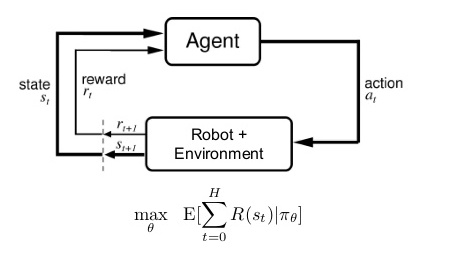

那麼知道了整個過程，任務的目標就出來了，那就是要能獲取儘可能多的Reward。沒有目標，控制也就無從談起，因此，獲取Reward就是一個量化的標準，Reward越多，就表示執行得越好。每個時間片，Agent都是根據當前的觀察來確定下一步的動作。觀察Observation的集合就作為Agent的所處的狀態State，因此，狀態State和動作Action存在映射關係，也就是一個state可以對應一個action，或者對應不同動作的概率（常常用概率來表示，概率最高的就是最值得執行的動作）。

狀態State到動作Action的過程就稱之為一個策略Policy，一般用$\pi$表示，也就是需要找到以下關係：

$$ a=\pi(s) $$
或者

$$\pi(a|s)$$
其中 $a$ 是action，$s$ 是state。第一種是一一對應的表示，第二種是概率的表示。

#### 增強學習的任務就是找到一個最優的策略Policy從而使Reward最多。

我們一開始並不知道最優的策略是什麼，因此往往從隨機的策略開始，使用隨機的策略進行試驗，就可以得到一系列的狀態,動作和反饋：

$$
\{s_1,a_1,r_1,s_2,a_2,r_2,...s_t,a_t,r_t\}
$$

這就是一系列的樣本Sample。增強學習的算法就是需要根據這些樣本來改進Policy，從而使得得到的樣本中的Reward更好。由於這種讓Reward越來越好的特性，所以這種算法就叫做增強學習Reinforcement Learning。

### MDP（Markov Decision Process）馬爾科夫決策過程
MDP基於這樣一種假設：未來只取決於當前

一個狀態$S_t$是Markov當且僅當
$$
P(s_{t+1}|s_t)=P(s_{t+1}|s_t,s_{t-1},...s_1,s_0)
$$

$P$為概率。簡單的說就是下一個狀態僅取決於當前的狀態和當前的動作。注意這裡的狀態是完全可觀察的全部的環境狀態（也就是上帝視角）。

一個基本的MDP可以用$（S,A,P）$來表示，$S$ 表示狀態，$A$ 表示動作，$P$ 表示狀態轉移概率，也就是根據當前的狀態 $s_t$ 和 $a_t$ 轉移到 $s_{t+1}$ 的概率。如果我們知道了轉移概率 $P$，也就是稱為我們獲得了模型Model，有了模型，未來就可以求解，那麼獲取最優的動作也就有可能，這種通過模型來獲取最優動作的方法也就稱為Model-based的方法。但是現實情況下，很多問題是很難得到準確的模型的，因此就有Model-free的方法來尋找最優的動作。

### 回報Return


在增強式學習，狀態的好壞其實等價於對未來回報的期望。因此，引入回報Return來表示某個時刻t的狀態將具備的回報：
$$
G_t = R_{t+1} + \lambda R_{t+2} + ... = \sum_{k=0}^\infty\lambda^kR_{t+k+1}
$$

上面$R$是Reward獎勵，$\lambda$是discount factor折扣因子，一般小於1，就是說一般當下的反饋是比較重要的，時間越久，影響越小。


那麼實際上除非整個過程結束，否則顯然我們無法獲取所有的reward來計算出每個狀態的Return，因此，再引入一個概念價值函數Value Function,用value function $v(s)$來表示一個狀態未來的潛在價值。還是上面的例子，這裡就變成是向左看感覺左邊是懸崖那麼左邊的狀態的估值就低。

從定義上看，value function就是回報的期望：
$$
v(s) = \mathbb E[G_t|S_t = s]
$$

引出價值函數，對於獲取最優的策略Policy這個目標，我們就會有兩種方法：

  * 直接優化策略$\pi(a|s)$或者$a = \pi(s)$使得回報更高
  * 通過估計value function來間接獲得優化的策略。道理很簡單，既然我知道每一種狀態的優劣，那麼我就知道我應該怎麼選擇了，而這種選擇就是我們想要的策略。

當然了，還有第三種做法就是融合上面的兩種做法，這也就是以後會講到的actor-critic算法。但是現在為了理解DQN，我們將只關注第二種做法，就是估計value function的做法，因為DQN就是基於value function的算法。



### Bellman方程

重新檢視 Value Function：
$$
v(s) = \mathbb E[G_t|S_t = s]
$$

把上式展开如下：

\begin{align}
 v(s) & = \mathbb E[G_t|S_t = s] \\\\
      & = \mathbb E[R_{t+1}+\lambda R_{t+2} + \lambda ^2R_{t+3} + ...|S_t = s] \\\\ 
      & = \mathbb E[R_{t+1}+\lambda (R_{t+2} + \lambda R_{t+3} + ...)|S_t = s] \\\\
      & = \mathbb E[R_{t+1} + \lambda G_{t+1}|S_t = s] \\\\ 
      & = \mathbb E[R_{t+1} + \lambda v(S_{t+1})|S_t = s]
\end{align}

因此，
$$
v(s) = \mathbb E[R_{t+1} + \lambda v(S_{t+1})|S_t = s]
$$
这个公式就是Bellman方程的基本形态。



### Action-Value function 動作價值函數

考慮到每個狀態之後都有多種動作可以選擇，每個動作之下的狀態又多不一樣，我們更關心在某個狀態下的不同動作的價值。顯然。如果知道了每個動作的價值，那麼就可以選擇價值最大的一個動作去執行了。這就是Action-Value function $Q^\pi(s,a)$。那麼同樣的道理，也是使用reward來表示，只是這裡的reward和之前的reward不一樣，這裡是執行完動作action之後得到的reward，之前state對應的reward則是多種動作對應的reward的期望值。顯然，動作之後的reward更容易理解。

那麼，有了上面的定義，動作價值函數就為如下表示：

$$
\begin{align}
Q^\pi(s,a) & =  \mathbb E[r_{t+1} + \lambda r_{t+2} + \lambda^2r_{t+3} + ... |s,a] \\\\
& = \mathbb E_{s^\prime}[r+\lambda Q^\pi(s^\prime,a^\prime)|s,a]
\end{align}
$$

這裡要說明的是動作價值函數的定義，加了$\pi$,也就是說是在策略下的動作價值。因為對於每一個動作而已，都需要由策略根據當前的狀態生成，因此必須有策略的支撐。而前面的價值函數則不一定依賴於策略。當然，如果定義 $v^\pi(s)$ 則表示在策略 $\pi$ 下的價值。

### Optimal value function 最優價值函數

能計算動作價值函數是不夠的，因為我們需要的是最優策略，現在求解最優策略等價於求解最優的value function，找到了最優的value function，自然而然策略也就是找到。（當然，這只是求解最優策略的一種方法，也就是value-based approach，由於DQN就是value-based，因此這裡只講這部分，以後我們會看到還有policy-based和model-based方法。一個就是直接計算策略函數，一個是估計模型，也就是計算出狀態轉移函數，從而整個MDP過程得解）

這裡以動作價值函數來分析。

首先是最優動作價值函數和一般的動作價值函數的關係：

$$
Q^*(s,a) = \max_\pi Q^\pi(s,a)
$$

也就是最優的動作價值函數就是所有策略下的動作價值函數的最大值。通過這樣的定義就可以使最優的動作價值的唯一性，從而可以求解整個MDP。


那麼套用之前得到的value function，可以得到

$$
Q^*(s,a) = \mathbb E_{s^\prime}[r+\lambda \max _{a^\prime}Q^*(s^\prime,a^\prime)|s,a]
$$

因為最優的$Q$值必然為最大值，所以，等式右側的$Q$值必然為使$a′$取最大的$Q$值。